In [2]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim

import pandas as pd


import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
 #importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/smart_grid_stability_augmented.csv')
dataset.replace({'stabf': {'unstable':0, 'stable':1}}, inplace=True)
dataset.drop(columns=['stab'])

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,1
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,1
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
x = dataset.iloc[:, :12]
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)
#x = (x-x.min())/(x.max()-x.min())
y = dataset['stabf']
x = x.to_numpy()
y = y.to_numpy()
X_test= x[len(x)-1000:len(x)]
t_test=y[len(x)-1000:len(x)]

X_val= x[len(x)-2000:len(x)-1000]
y_val=y[len(x)-2000:len(x)-1000]

In [7]:
x_train=torch.tensor(x[0:50000], dtype=torch.float)
y_train=torch.from_numpy(y[0:50000]).long()

x_test=torch.tensor(X_test, dtype=torch.float)
y_test=torch.from_numpy(t_test).long() 

x_val=torch.tensor(X_val, dtype=torch.float)
y_val=torch.from_numpy(y_val).long()

In [8]:
model = nn.Sequential(
    nn.Linear( in_features=12, out_features=100),
    nn.ReLU(),
    nn.Linear( in_features=100, out_features=2),
)

In [18]:

ce_loss = nn.CrossEntropyLoss()
#kl_loss = nn.BKLLoss(reduction='mean', last_layer_only=False)
#kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.005)

AttributeError: ignored

In [ ]:
#kl_weight = 0.1

In [ ]:
# for step in range(1000):
#     pre = model(x_train)
#     ce = ce_loss(pre, y_train)
#     kl = kl_loss(model)
#     cost = ce + kl_weight*kl
    
#     optimizer.zero_grad()
#     cost.backward()
#     optimizer.step()
    
# _, predicted = torch.max(pre.data, 1)
# total = y_train.size(0)
# correct = (predicted == y_train).sum()
# print('- Accuracy: %f %%' % (100 * float(correct) / total))
# print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

# Train

In [12]:
epochs=3000
loss =torch.tensor([])
#KL = torch.tensor([])
#Cost = torch.tensor([])

loss_val =torch.tensor([])
#KL_val = torch.tensor([])
#Cost_val = torch.tensor([])

train_acc = torch.tensor([])
val_acc = torch.tensor([])


for step in range(epochs):
    pre = model(x_train)
    ce = ce_loss(pre, y_train)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    loss = torch.cat((loss,torch.tensor([ce.item()])),0)
   # KL = torch.cat((KL,torch.tensor([kl.item()])),0)
    #Cost = torch.cat((Cost,torch.tensor([cost.item()])),0)
    
    pre_val = model(x_val)
    ce_val = ce_loss(pre_val, y_val)
    #kl_val = kl_loss(model)
    #cost_val = ce_val + kl_weight*kl_val
    
    loss_val = torch.cat((loss_val,torch.tensor([ce_val.item()])),0)
    #KL_val = torch.cat((KL_val,torch.tensor([kl_val.item()])),0)
    #Cost_val = torch.cat((Cost_val,torch.tensor([cost_val.item()])),0)
    
    #accuracy check
    
    #train accuracy
    _, predicted = torch.max(pre.data, 1)
    total = y_train.size(0)
    correct = (predicted == y_train).sum()
    train_acc = torch.cat((train_acc,torch.tensor([100 * float(correct) / total])),0)
    
    #val accuracy
    _, predicted = torch.max(pre_val.data, 1)
    total = y_val.size(0)
    correct = (predicted == y_val).sum()
    val_acc = torch.cat((val_acc,torch.tensor([100 * float(correct) / total])),0)
    
    

In [13]:
epoc =torch.tensor( np.arange(1,epochs+1))

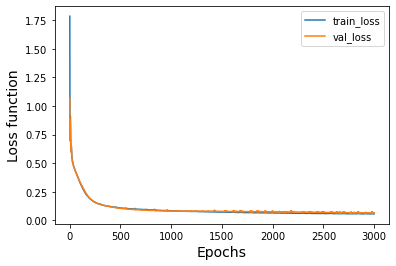

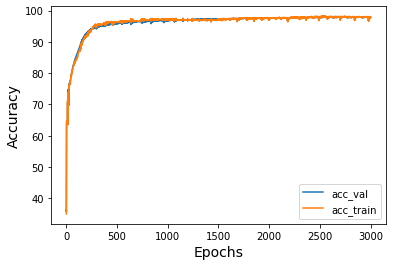

In [14]:

plt.plot(epoc,loss,label='train_loss')
plt.plot(epoc,loss_val,label='val_loss')
plt.xlabel('Epochs',size=14)
plt.ylabel('Loss function',size=14)
plt.legend()
plt.show()
plt.plot(epoc,train_acc,label='acc_val')
plt.plot(epoc,val_acc,label='acc_train')
plt.xlabel('Epochs',size=14)
plt.ylabel('Accuracy',size=14)
plt.legend()
plt.show()

#plt.plot(epoc,Cost_val,label='Cost_val')
#plt.plot(epoc,Cost,label='Cost_train')
#plt.xlabel('Epochs',size=14)
#plt.ylabel('Cost',size=14)
#plt.legend()
#plt.show()

#plt.plot(epoc,KL_val,label='KL_val')
#plt.plot(epoc,KL,label='KL_train')
#plt.xlabel('Epochs',size=14)
#plt.ylabel('KL',size=14)
#plt.legend()
#plt.show()

# Test Model

In [15]:
pre_test = model(x_test)
_, predicted = torch.max(pre_test.data, 1)
total = y_test.size(0)
correct = (predicted == y_test).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f' % (ce.item()))

- Accuracy: 97.800000 %
- CE : 0.06


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

Classification Report:
              precision    recall  f1-score   support

           1     0.9707    0.9707    0.9707       376
           0     0.9824    0.9824    0.9824       624

    accuracy                         0.9780      1000
   macro avg     0.9766    0.9766    0.9766      1000
weighted avg     0.9780    0.9780    0.9780      1000



[Text(0, 0.5, 'STABLE'), Text(0, 1.5, 'UNSTABLE')]

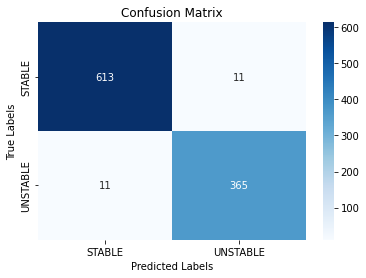

In [17]:
print('Classification Report:')

print(classification_report(y_test, predicted, labels=[1,0], digits=4))       
cm_det = confusion_matrix(y_test, predicted)
ax= plt.subplot()
sns.heatmap(cm_det, annot=True, ax = ax, cmap='Blues', fmt="d")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

ax.xaxis.set_ticklabels(['STABLE', 'UNSTABLE'])
ax.yaxis.set_ticklabels(['STABLE', 'UNSTABLE'])